In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

### Load the data

In [4]:
penguins_path = 'penguins.csv'
penguins_df = pd.read_csv(penguins_path)

#### Drop rows with missing values

In [5]:
penguins_df.dropna(inplace=True)

#### Select the features for clustering

In [6]:
features = penguins_df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

#### Standardize the features

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#### Apply K-Means clustering

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [9]:
penguins_df['Cluster'] = clusters

### Visualize the clusters

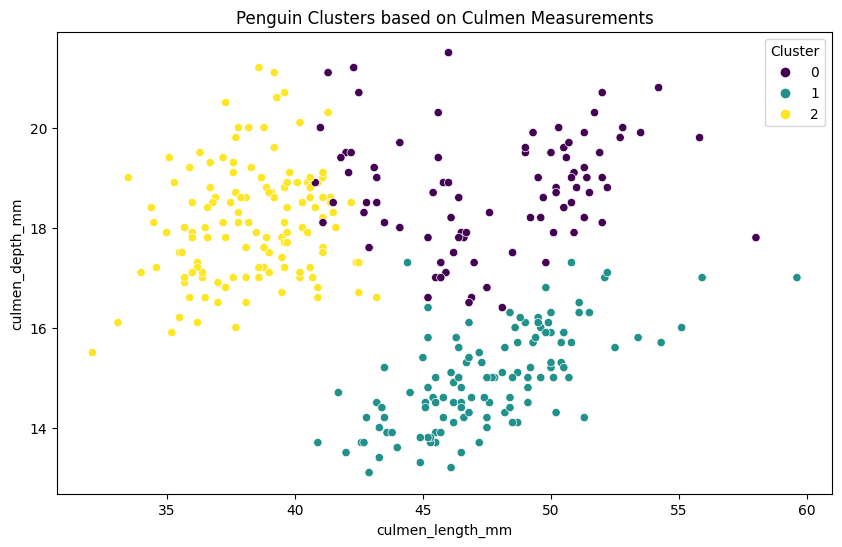

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins_df, x='culmen_length_mm', y='culmen_depth_mm', hue='Cluster', palette='viridis')
plt.title('Penguin Clusters based on Culmen Measurements')
plt.show()

# ADDITIONAL

## Improvement

#### Elbow Method

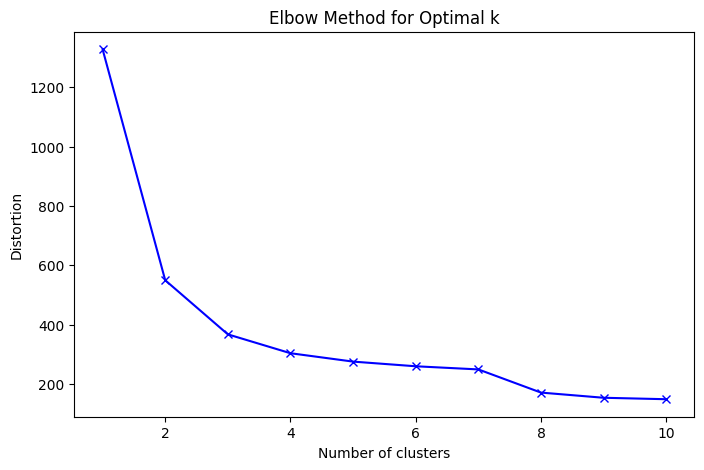

In [11]:
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

#### Silhouette Score

In [12]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.447862335700844


### Pairplot: 
#### To visualize the relationship between different features and clusters

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

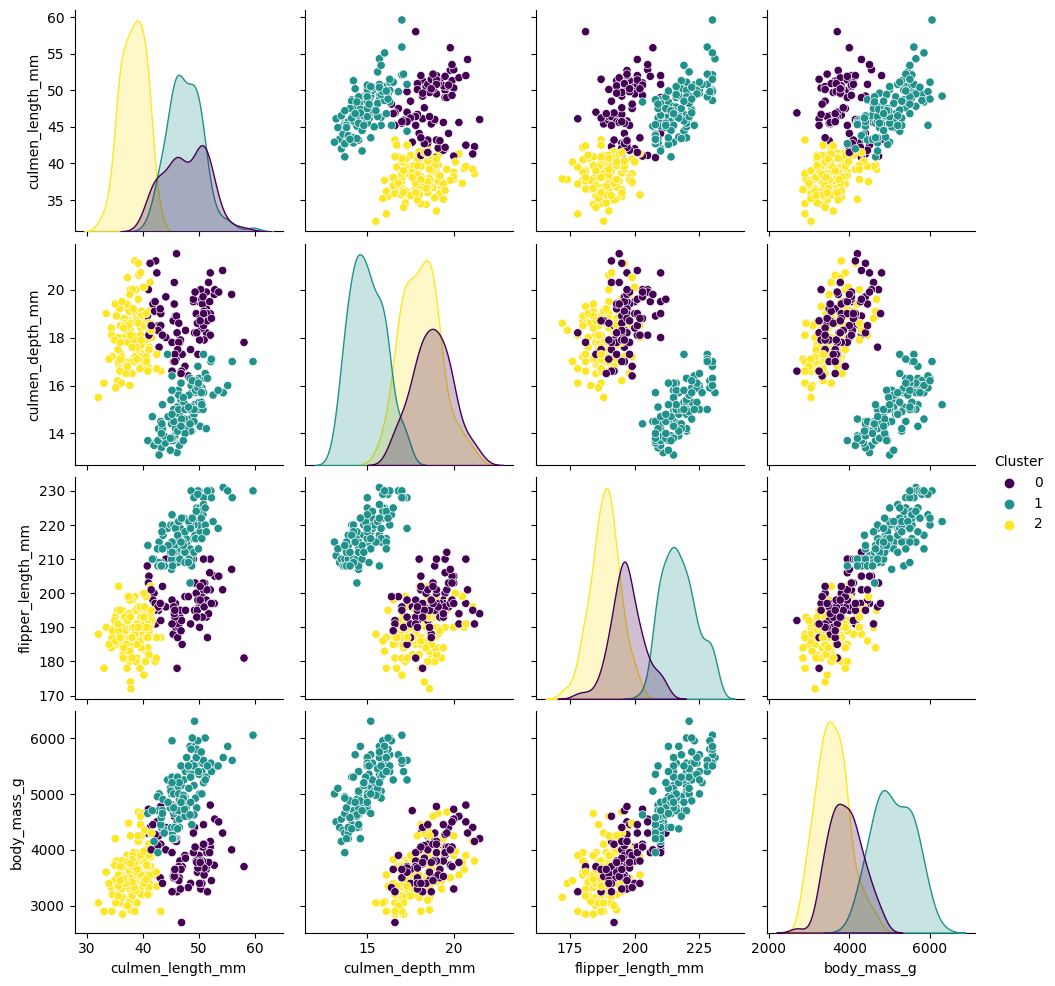

In [13]:
sns.pairplot(penguins_df, hue='Cluster', palette='viridis')
plt.show()